# Project: Investigate a Dataset - The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project we will be investigating a movie database to gain insight into what attributes could potentially indicate profitable and successful films and actors.

Here is a basic list of the data provided in the database with a brief description of each data point:


* id - unique identifier

* imdb_id	- official internet movie database identifier

* popularity - how popular a film is generally, not taking into account any ratings

* budget - total cost of making the movie
* revenue	- total amount of money generated from movie sales
* original_title - name of the movie

* cast - names of actors featured in the movie
* homepage - website associated with the movie release

* director - name of the person who directed the film
* tagline - A very short sentence that sums up the idea of the movie, generally used in posters, advertisements,     trailers, etc... not all movies use taglines.
* overview - a more descriptive synopsis of the movie that gives details in a quick and neat pitch to hook people into * seeing the movie.. 
* runtime	- how long the movie is
* genres - what category of film the movie belongs to
* production_companies - any company involved in the production of the film
* release_date - the specific date that the movie was released
* vote_count - amount of votes received by general public
* vote_average - the average vote received by general public combined
* release_year - the year the movie was released
* budget_adj	- total cost of making the movie adjusted for 2010 inflation rates over time
* revenue_adj - total amount of money generated from movie sales adjusted for 2010 inflation rates over time


### Question(s) for Analysis
##### - We will be exploring the following questions throughout this project:
>**Which actors have been a part of the most profit generating movies throughout all of their roles?**

>**Which actors have received the lowest ratings altogether?**

>**Is there a relation between how many votes a movie receives to the revenue it brings in?**



In [941]:
## Import all necessary packages and load data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
df = pd.read_csv('tmdb_movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [942]:
## Get a better understanding of the dataset we are working with
df.shape

(10866, 21)

In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [944]:
# Based on the non-null numbers in some of the above columns, there is likely a good amount of data 
# that will not be helpful in investigating this dataset - which we will drop once we've gotten rid of any duplicates
# some data points I would drop would be any movie without a production company, cast, or director. These are 
# important elements in seeing what trending attributes lead to profitable or popular movies.


### Data Cleaning

In [945]:
## Need to get rid of any duplicate rows

df_unique = df.drop_duplicates()
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [946]:
## I first tried to drop unnecessary columns, but received errors saying the labels were not in the appropriate axis,
## so to workaround this error I will reindex the columns individually.
df_index = ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 
            'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 
            'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 
            'budget_adj', 'revenue_adj']
print(df_index)


['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [947]:
df_new = df_unique.reset_index(drop=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [948]:
## Drop columns that I won't be using and create a new dataframe

df1 = df_new.drop(['overview', 'imdb_id', 'tagline', 'homepage', 'budget_adj', 'revenue_adj'], axis=1)

In [949]:
## Drop remaining rows with null values in order to create the main dataframe that we will actually be analyzing

df2 = df1.dropna()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10864
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8666 non-null   int64  
 1   popularity            8666 non-null   float64
 2   budget                8666 non-null   int64  
 3   revenue               8666 non-null   int64  
 4   original_title        8666 non-null   object 
 5   cast                  8666 non-null   object 
 6   director              8666 non-null   object 
 7   keywords              8666 non-null   object 
 8   runtime               8666 non-null   int64  
 9   genres                8666 non-null   object 
 10  production_companies  8666 non-null   object 
 11  release_date          8666 non-null   object 
 12  vote_count            8666 non-null   int64  
 13  vote_average          8666 non-null   float64
 14  release_year          8666 non-null   int64  
dtypes: float64(2), int64

In [950]:
## Need to clean out any data that has been recorded with 0 for revenue or runtime as this is very likely
## to be incorrectly recorded data
df2 = df1.loc[~((df1['revenue'] == 0) | (df1['runtime'] == 0))]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10847
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4849 non-null   int64  
 1   popularity            4849 non-null   float64
 2   budget                4849 non-null   int64  
 3   revenue               4849 non-null   int64  
 4   original_title        4849 non-null   object 
 5   cast                  4844 non-null   object 
 6   director              4848 non-null   object 
 7   keywords              4614 non-null   object 
 8   runtime               4849 non-null   int64  
 9   genres                4849 non-null   object 
 10  production_companies  4753 non-null   object 
 11  release_date          4849 non-null   object 
 12  vote_count            4849 non-null   int64  
 13  vote_average          4849 non-null   float64
 14  release_year          4849 non-null   int64  
dtypes: float64(2), int64

In [951]:
## Test to make sure data was cleaned properly 
df2

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,6/21/66,74,7.5,1966
10827,5780,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966
10828,6644,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966
10834,5923,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966


In [952]:
## Now that we have narrowed our database from 10,800+ data points down to 4,849
## we can move onto the exploratory data analysis phase


<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will be exploring the following questions and creating visualizations to help answer them.

* Which actors have been a part of the most profit generating movies throughout all of their roles?
* Which actors have received the lowest ratings altogether?
* Is there a relation between how many votes a movie receives to the revenue it brings in?


## Question 1 - Which actors have been a part of the most profit generating movies throughout all of their roles?


In [953]:
#To answer this question, we need to be able to expand the list of actors on each film while still keeping
#the associated film data in tact, which we will do by using the .explode() function
#but first we need to reformat the dataframe we are working with to be more optimized around the cast

In [954]:
#delimit the cast column to separate actor names as they are currently separated in each individual cell by a "|"
df_sepcast = pd.DataFrame()
df_sepcast['cast'] = df2['cast'].str.split('|')
df_sepcast['revenue'] = df2['revenue']
df_sepcast['original_title'] = df2['original_title']
df_sepcast['popularity'] = df2['popularity']
df_sepcast['film_count'] = df2['original_title'] 
## director count will be used to distinguish the amount films an actor has done in total, not 
## exactly regarding how many times an actor has worked with the same director 

df_sepcast['budget'] = df2['budget']
df_sepcast['director_count'] = df2['director']

In [955]:
df_sepcast['ratings_average'] = df2['vote_average']

In [956]:
#explode the dataframe to create separate rows for each cast member listed on each movie
df_castex = df_sepcast.explode('cast')

In [957]:
#quickly organize actors by popularity and go over the data we have so far
df_castsort = df_castex.sort_values(by=['popularity'], ascending=False)
df_castsort.head()

,cast,revenue,original_title,popularity,film_count,budget,director_count,ratings_average
0,Chris Pratt,1513528810,Jurassic World,32.985763,Jurassic World,150000000,Colin Trevorrow,6.5
0,Irrfan Khan,1513528810,Jurassic World,32.985763,Jurassic World,150000000,Colin Trevorrow,6.5
0,Vincent D'Onofrio,1513528810,Jurassic World,32.985763,Jurassic World,150000000,Colin Trevorrow,6.5
0,Nick Robinson,1513528810,Jurassic World,32.985763,Jurassic World,150000000,Colin Trevorrow,6.5
0,Bryce Dallas Howard,1513528810,Jurassic World,32.985763,Jurassic World,150000000,Colin Trevorrow,6.5


In [958]:
# I see that the .explode() function worked as expected since the index number stayed the same for each row that
# shares the exact same data except for the cast member - but I also want to be able to combine every single
# movie that one actor has done into a designated row for that actor, so I will need to separate each film title with
# a comma and use an aggregate function to put all of this data together

In [959]:
df_castsort['original_title'] += (', ')  #this will allow for movie titles that actors
                                        # have worked on to look cleaner in this dataset


In [960]:
aggregation_functions = {'film_count': 'nunique', 'revenue': 'sum', 'budget' : 'sum', 'original_title': 'sum', 
                         'popularity' : 'sum', 'director_count' : 'nunique', 'ratings_average' : 'mean'}
                                                            

In [961]:
df_newcast = df_castsort.groupby(df_castsort['cast']).aggregate(aggregation_functions)
df_newcast2 = df_newcast.sort_values(by=['ratings_average'], ascending=False)
df_newcast2 = df_newcast2.reset_index(level=None, drop=False, inplace=False, col_level=0 )
#resetting the index just to be sure the cast column didn't become the index so I can avoid that issue later on

df_newcast2.head(20)

,cast,film_count,revenue,budget,original_title,popularity,director_count,ratings_average
0,David Byrne,1,4978922,1200000,"Stop Making Sense,",0.283191,1,8.4
1,Tina Weymouth,1,4978922,1200000,"Stop Making Sense,",0.283191,1,8.4
2,Chris Frantz,1,4978922,1200000,"Stop Making Sense,",0.283191,1,8.4
3,Jerry Harrison,1,4978922,1200000,"Stop Making Sense,",0.283191,1,8.4
4,Steven Scales,1,4978922,1200000,"Stop Making Sense,",0.283191,1,8.4
5,Richard S. Castellano,1,245066411,6000000,"The Godfather,",5.738034,1,8.3
6,Austin Stowell,1,13993093,3300000,"Whiplash,",4.780419,1,8.2
7,Jayson Blair,1,13993093,3300000,"Whiplash,",4.780419,1,8.2
8,Iris Apfel,1,1339650,0,"Bill Cunningham New York,",0.052322,1,8.1
9,Carmen Dell'Orefice,1,1339650,0,"Bill Cunningham New York,",0.052322,1,8.1


In [962]:
## While looking at the above data, I can tell that I will want to focus more on actors who have 
## been in at least more than 4 films to get a better idea of their average rating - 
## but I will come back around to that in the following section

In [963]:
## In order to answer the question of which actors have 
## been a part of the most profit generating movies - I need to create a new column that calculates
## the difference between the revenues and budgets associated with them altogether to see the total profit

In [964]:
df_newcast2['total_profit'] = df_newcast2['revenue'] - df_newcast2['budget']
df_newcast2 = df_newcast2.sort_values(by=['total_profit'], ascending=False)
df_newcast2.head(20)

,cast,film_count,revenue,budget,original_title,popularity,director_count,ratings_average,total_profit
2790,Harrison Ford,36,8922840695,1973950000,"Star Wars, Star Wars: The Force Awakens, The E...",78.160845,30,6.438889,6948890695
1550,Emma Watson,13,8176916698,1493000000,"Harry Potter and the Philosopher's Stone, Harr...",53.493905,9,6.769231,6683916698
1277,Daniel Radcliffe,12,7863036755,1352000000,"Harry Potter and the Philosopher's Stone, Harr...",50.021930,8,6.900000,6511036755
1876,Tom Hanks,37,8418142612,1951000000,"Forrest Gump, Toy Story, The Da Vinci Code, Br...",63.061860,26,6.678378,6467142612
2780,Tom Cruise,34,8812436186,2364000000,"Mission: Impossible - Rogue Nation, Oblivion, ...",58.289863,30,6.444118,6448436186
1009,Rupert Grint,12,7696691044,1288000000,"Harry Potter and the Philosopher's Stone, Harr...",48.788138,8,7.000000,6408691044
1577,Ian McKellen,16,8115046043,1970000000,"The Hobbit: The Battle of the Five Armies, The...",59.219027,8,6.737500,6145046043
3184,Robert Downey Jr.,29,7419289468,1836300000,"The Avengers, Avengers: Age of Ultron, Iron Ma...",52.422368,24,6.365517,5582989468
2688,Ralph Fiennes,25,7135927496,1804700000,"Spectre, Harry Potter and the Goblet of Fire, ...",53.066951,20,6.488000,5331227496
4770,Cameron Diaz,30,6998239015,1790500000,"Sex Tape, Shrek, The Holiday, Bad Teacher, Shr...",45.863895,27,6.070000,5207739015


Text(0.5, 1.0, '20 Most Profitable Movie Actors')

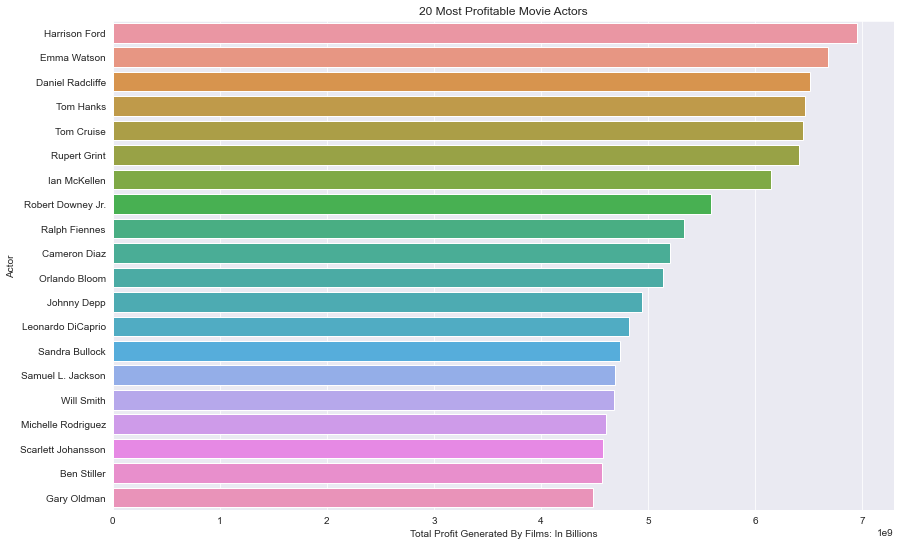

In [965]:
## In order to create the visualization, we need to filter out the data we are going to plot
actors = df_newcast2.nlargest(20, "total_profit")
plt.figure(figsize=(14,9))
sns.barplot(x='total_profit',y='cast', data=actors)
sns.set_style('darkgrid')

plt.xlabel('Total Profit Generated By Films: In Billions')
plt.ylabel('Actor')
plt.title("20 Most Profitable Movie Actors")

In [966]:
## In looking at this list, I can already identify a handful of actors that were a part of major franchises,
## so that may unfairly boost them as the most profitable in this list - but it doesn't change the fact that 
## these are the most profitable movie actors in the database. It is worth noting that every movie with these
## actors may not be as profitable considering that a lot of the profitability generated was merely from the
## franchises themselves, not necessarily the actors ability to get people to see their movies.


## Question 2 - Which actors have received the highest/lowest ratings altogether?


In [967]:
## from the last section, I am going to drop all actors who have a film count of less than 7 to get a better
## look at actors who have been associated with a consistently lower rating average

df_newcast3 = df_newcast2
df_newcast3 = df_newcast3[df_newcast3['film_count'] > 7]  


In [968]:
df_newcast3 = df_newcast3.sort_values(by=['ratings_average'], ascending=True)
df_newcast3.head(20)

,cast,film_count,revenue,budget,original_title,popularity,director_count,ratings_average,total_profit
7923,Chuck Norris,11,137475488,15960000,"Code of Silence, Firewalker, Missing in Action...",2.878059,8,4.981818,121515488
7818,Rob Schneider,9,546515370,226000000,"50 First Dates, Judge Dredd, The Hot Chick, De...",8.029342,9,5.088889,320515370
7717,Lindsay Lohan,10,492150275,188250000,"Mean Girls, Machete, Just My Luck, Freaky Frid...",10.696341,9,5.100000,303900275
7799,Hilary Duff,8,402297333,189000000,"A Cinderella Story, Cheaper by the Dozen, The ...",4.333309,8,5.100000,213297333
7684,Christopher Lambert,8,250424823,143000000,"Highlander, Highlander II: The Quickening, Mor...",6.048182,7,5.175000,107424823
7548,Freddie Prinze Jr.,8,776618504,240000000,"Scooby-Doo 2: Monsters Unleashed, I Know What ...",7.141753,6,5.237500,536618504
7519,Dolph Lundgren,9,624171010,277500000,"The Expendables, The Expendables 2, Johnny Mne...",9.585168,8,5.288889,346671010
7333,Jean-Claude Van Damme,16,574024686,269000000,"Bloodsport, The Quest, Kickboxer, Cyborg, Time...",11.069767,13,5.356250,305024686
7080,Steven Seagal,10,679812229,353500000,"Under Siege, Executive Decision, Under Siege 2...",6.272074,9,5.450000,326312229
7074,Breckin Meyer,8,771786655,359000000,"Garfield, Ghosts of Girlfriends Past, Garfield...",8.660232,8,5.462500,412786655


Text(0.5, 1.0, '20 Lowest Rated Movie Actors')

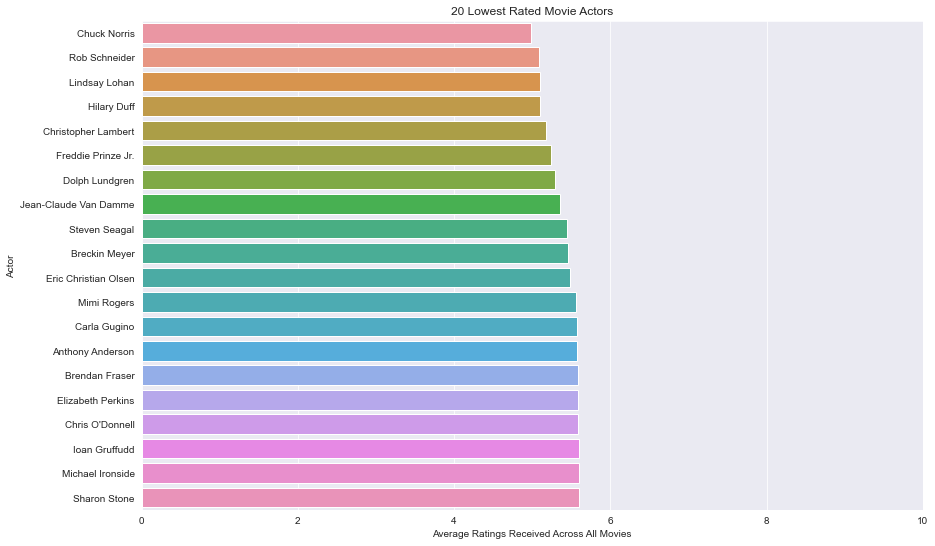

In [969]:
## In order to create the visualization, we need to filter out the data we are going to plot
actors_low = df_newcast3.nsmallest(20, "ratings_average")
plt.figure(figsize=(14,9))
sns.barplot(x='ratings_average',y='cast', data=actors_low)
sns.set_style('darkgrid')
# need to adjust the limit of x-axis to put in perspective of 0-10 rank system
plt.xlim(0, 10)

plt.xlabel('Average Ratings Received Across All Movies')
plt.ylabel('Actor')
plt.title("20 Lowest Rated Movie Actors")

Text(0.5, 1.0, '20 Highest Rated Movie Actors')

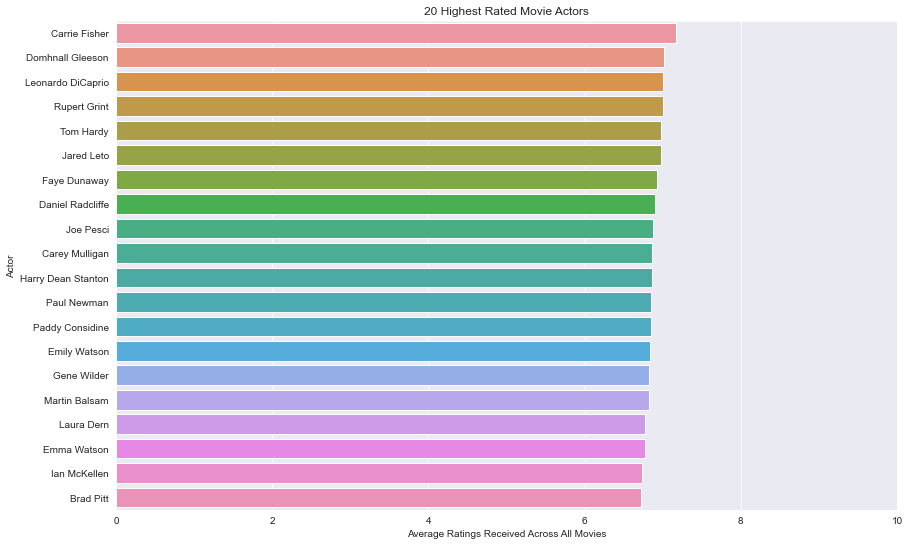

In [970]:
## Now that we can see the worst ratings amongst actors on average - it would also be useful to see the best ratings

df_newcast4 = df_newcast3.sort_values(by=['ratings_average'], ascending=False)
actors_low = df_newcast4.nlargest(20, "ratings_average")
plt.figure(figsize=(14,9))
sns.barplot(x='ratings_average',y='cast', data=actors_low)
sns.set_style('darkgrid')
plt.xlim(0, 10)

plt.xlabel('Average Ratings Received Across All Movies')
plt.ylabel('Actor')
plt.title("20 Highest Rated Movie Actors")

In [971]:
## Analysis - Now that I can clearly see the 20 lowest and highest rated actors in this database
## I can see that there are plenty of very well known actors who have achieved low ratings. Considering that the
## lowest rated actors have been in at least 7 films and still have achieved the lowest ratings - it would 
## still might be a better decision for a filmmaker to look higher up on this list in their casting calls.

## Question 3 - Is there a relation between how many votes a movie receives to the revenue it brings in?



In [972]:
## For this section, we can go back and use the dataframe from the beginning to see the ratings data

df2.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


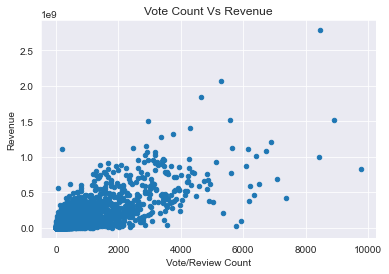

In [973]:
# Using a general scatterplot would be a good way to visualize this kind of question

df2.plot(x ='vote_count', y='revenue', kind = 'scatter')
plt.title('Vote Count Vs Revenue')
plt.xlabel('Vote/Review Count')
plt.ylabel('Revenue');

In [974]:
## There is a very visible diminishing of returns as the review counts pass the 4,000 vote count mark
## aside from a few outliers here and there.
## It appears that for most of the cases with 4,000+ votes the revenue seems to hit a threshold of revenue that is 
## not much higher than many films that were in the 2,000-4,000 vote count range. 
## Still, the vote count range from 0-2,000 appears to be a wild card as there seem to be quite a bit of 
## films with approximately 2,000 reviews and still in the 0-0.5 revenue mark.

# I believe there is a definite correlation between review count and revenue, but at some point it stops making
# as much of a difference than other potential attributes of a film.

<a id='conclusions'></a>
## Conclusions
##### - If I were to make a film, this data would give me some insight into what actors would be profitable and even efficient to work with based off of being able to see the extent of their experience with multiple directors, as well as being able to see who may bring in more harmful ratings. It would be useful if there was more accurate data, as some important revenue data was entirely missing or just blatantly incorrect with big name actors involved in a film that recorded 0 revenue. Also, it would be useful to have the information on the screenwriters involved in all of the films in this dataset and to see what portions of the budget went strictly to marketing as well as data on the marketing team/companies involved. If you could see which movies had the most success while spending the least amount of the budget on marketing that would be very valuable.


### Limitations
##### - I would like to be able to accurately describe actors in terms of the keywords that are normally used to describe the movies they play in. I ran into a similar problem in this project in regards to the directors associated with each actor in the database. When I created a list of all the directors that each actor had worked with, there were many duplicates of the same director as many actors work with the same one multiple times. I tried to research ways to get around this, but instead I opted to use a unique count of the directors and compared them to the amount of films an actor had done. This does work slightly better in my opinion in a broad sense of being able to quickly look at all the information, but it would be more useful to see how many times an actor worked specifically with one director. 
